In [47]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df_2022 = pd.read_fwf('COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)
df_2023 = pd.read_fwf('COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)
df_2024 = pd.read_fwf('COTAHIST_A2024.TXT', colspecs=colspecs, names=names, header=None)



In [48]:

df_2022.head(100)

,Data,Codigo,Preco_Abertura,Preco_Fechamento
0,COTAHIST,.2022BOVESPA,NaN,NaN
1,20220103,02GNDI3,5970.0,5727.0
2,20220103,02ABEV3,1542.0,1515.0
3,20220103,02MODL11,1080.0,1071.0
4,20220103,02TASA4,2500.0,2428.0
...,...,...,...,...
95,20220218,12VSLH11,949.0,948.0
96,20220218,12GCRI11,9795.0,9770.0
97,20220218,12PRSN11B,158.0,143.0
98,20220218,12ONEF11,14997.0,14997.0


In [49]:
df_2023.head()

,Data,Codigo,Preco_Abertura,Preco_Fechamento
0,COTAHIST,.2023BOVESPA,NaN,NaN
1,20230102,02NEOE3,1540.0,1498.0
2,20230102,02NEXP3,31.0,29.0
3,20230102,02NGRD3,148.0,143.0
4,20230102,02NINJ3,270.0,269.0


In [50]:
df_2024.head(10)

,Data,Codigo,Preco_Abertura,Preco_Fechamento
0,COTAHIST,.2024BOVESPA,NaN,NaN
1,20240102,02AALR3,1020.0,850.0
2,20240102,02ABCB4,2398.0,2279.0
3,20240102,02ABEV3,1372.0,1359.0
4,20240102,02BBDC3,1526.0,1498.0
5,20240102,02ALPA3,1011.0,999.0
6,20240102,02ALPA4,1010.0,931.0
7,20240102,02ALPK3,492.0,447.0
8,20240102,02ALUP11,3146.0,3025.0
9,20240102,02ALUP3,1046.0,1007.0


In [51]:
frames = [df_2022, df_2023]
df_2022e2023 = pd.concat(frames)
df_2022e2023.head()

,Data,Codigo,Preco_Abertura,Preco_Fechamento
0,COTAHIST,.2022BOVESPA,NaN,NaN
1,20220103,02GNDI3,5970.0,5727.0
2,20220103,02ABEV3,1542.0,1515.0
3,20220103,02MODL11,1080.0,1071.0
4,20220103,02TASA4,2500.0,2428.0


In [52]:
AMAZON_df = df_2022e2023[df_2022e2023['Codigo'].str.endswith('AMZO34')]

print(AMAZON_df)

             Data    Codigo  Preco_Abertura  Preco_Fechamento
152      20220103  02AMZO34         11955.0           11930.0
2541     20220119  02AMZO34         11200.0           10860.0
2565     20220221  02AMZO34          9960.0            9786.0
5904     20220204  02AMZO34         10557.0           10233.0
6807     20220104  02AMZO34         12302.0           12000.0
...           ...       ...             ...               ...
1345496  20231221  34AMZO34          3754.0            3702.0
1347177  20231222  34AMZO34          3740.0            3715.0
1349027  20231226  34AMZO34          3741.0            3689.0
1350523  20231227  34AMZO34          3708.0            3692.0
1352256  20231228  34AMZO34          3715.0            3698.0

[498 rows x 4 columns]


In [53]:
AMAZON_df['Data'] = pd.to_datetime(AMAZON_df['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
AMAZON_df['Ano'] = AMAZON_df['Data'].dt.year
AMAZON_df['Mes'] = AMAZON_df['Data'].dt.month
AMAZON_df['Dia'] = AMAZON_df['Data'].dt.day

C:\Users\srgio\AppData\Local\Temp\ipykernel_1368\4240046411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMAZON_df['Data'] = pd.to_datetime(AMAZON_df['Data'], format='%Y%m%d')
C:\Users\srgio\AppData\Local\Temp\ipykernel_1368\4240046411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMAZON_df['Ano'] = AMAZON_df['Data'].dt.year
C:\Users\srgio\AppData\Local\Temp\ipykernel_1368\4240046411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [54]:
print(AMAZON_df)

              Data    Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
152     2022-01-03  02AMZO34         11955.0           11930.0  2022    1    3
2541    2022-01-19  02AMZO34         11200.0           10860.0  2022    1   19
2565    2022-02-21  02AMZO34          9960.0            9786.0  2022    2   21
5904    2022-02-04  02AMZO34         10557.0           10233.0  2022    2    4
6807    2022-01-04  02AMZO34         12302.0           12000.0  2022    1    4
...            ...       ...             ...               ...   ...  ...  ...
1345496 2023-12-21  34AMZO34          3754.0            3702.0  2023   12   21
1347177 2023-12-22  34AMZO34          3740.0            3715.0  2023   12   22
1349027 2023-12-26  34AMZO34          3741.0            3689.0  2023   12   26
1350523 2023-12-27  34AMZO34          3708.0            3692.0  2023   12   27
1352256 2023-12-28  34AMZO34          3715.0            3698.0  2023   12   28

[498 rows x 7 columns]


In [55]:
AMAZON_df.isnull().sum()

Data                0
Codigo              0
Preco_Abertura      0
Preco_Fechamento    0
Ano                 0
Mes                 0
Dia                 0
dtype: int64

In [56]:
AMAZON2024_df = df_2024[df_2024['Codigo'].str.endswith('AMZO34')]

print(AMAZON2024_df)

            Data    Codigo  Preco_Abertura  Preco_Fechamento
923     20240102  34AMZO34          3675.0            3640.0
2888    20240103  34AMZO34          3694.0            3653.0
4563    20240104  34AMZO34          3620.0            3544.0
5999    20240105  34AMZO34          3555.0            3521.0
8078    20240108  34AMZO34          3555.0            3555.0
...          ...       ...             ...               ...
96409   20240322  34AMZO34          4453.0            4409.0
98163   20240325  34AMZO34          4450.0            4422.0
99763   20240326  34AMZO34          4497.0            4430.0
101401  20240327  34AMZO34          4468.0            4427.0
103041  20240328  34AMZO34          4498.0            4476.0

[61 rows x 4 columns]


In [57]:
AMAZON2024_df['Data'] = pd.to_datetime(AMAZON2024_df['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
AMAZON2024_df['Ano'] = AMAZON2024_df['Data'].dt.year
AMAZON2024_df['Mes'] = AMAZON2024_df['Data'].dt.month
AMAZON2024_df['Dia'] = AMAZON2024_df['Data'].dt.day

print(AMAZON2024_df)

             Data    Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
923    2024-01-02  34AMZO34          3675.0            3640.0  2024    1    2
2888   2024-01-03  34AMZO34          3694.0            3653.0  2024    1    3
4563   2024-01-04  34AMZO34          3620.0            3544.0  2024    1    4
5999   2024-01-05  34AMZO34          3555.0            3521.0  2024    1    5
8078   2024-01-08  34AMZO34          3555.0            3555.0  2024    1    8
...           ...       ...             ...               ...   ...  ...  ...
96409  2024-03-22  34AMZO34          4453.0            4409.0  2024    3   22
98163  2024-03-25  34AMZO34          4450.0            4422.0  2024    3   25
99763  2024-03-26  34AMZO34          4497.0            4430.0  2024    3   26
101401 2024-03-27  34AMZO34          4468.0            4427.0  2024    3   27
103041 2024-03-28  34AMZO34          4498.0            4476.0  2024    3   28

[61 rows x 7 columns]


C:\Users\srgio\AppData\Local\Temp\ipykernel_1368\1667654215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMAZON2024_df['Data'] = pd.to_datetime(AMAZON2024_df['Data'], format='%Y%m%d')
C:\Users\srgio\AppData\Local\Temp\ipykernel_1368\1667654215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMAZON2024_df['Ano'] = AMAZON2024_df['Data'].dt.year
C:\Users\srgio\AppData\Local\Temp\ipykernel_1368\1667654215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

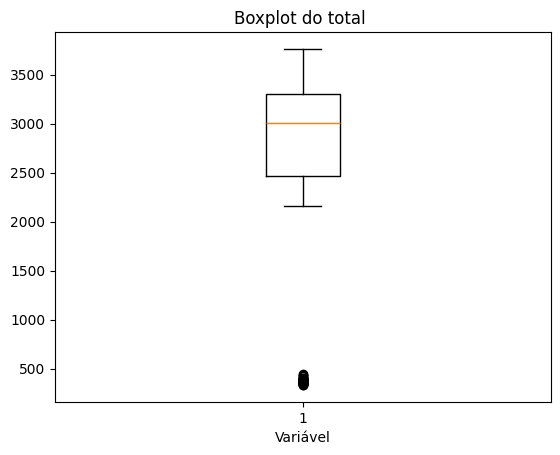

In [58]:
import matplotlib.pyplot as plt
limite = 4000
AMAZON_df  = AMAZON_df[AMAZON_df['Preco_Abertura'] < limite]
plt.boxplot(AMAZON_df['Preco_Abertura'])
plt.title('Boxplot do total ')
plt.xlabel('Variável')
plt.show()

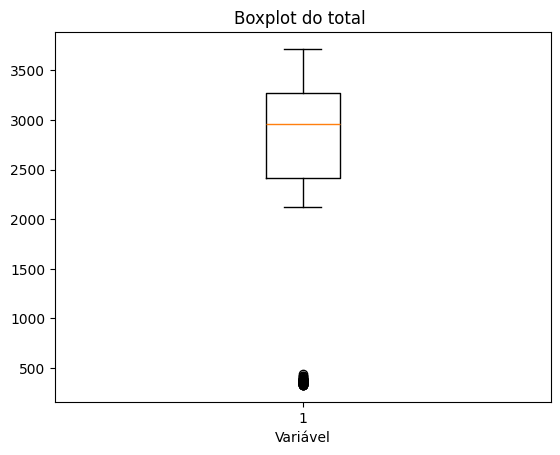

In [59]:
limite = 4000
AMAZON_df  = AMAZON_df[AMAZON_df['Preco_Fechamento'] < limite]
plt.boxplot(AMAZON_df['Preco_Fechamento'])
plt.title('Boxplot do total ')
plt.xlabel('Variável')
plt.show()

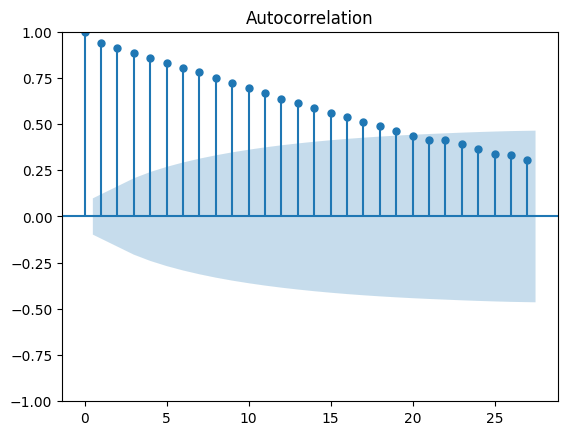

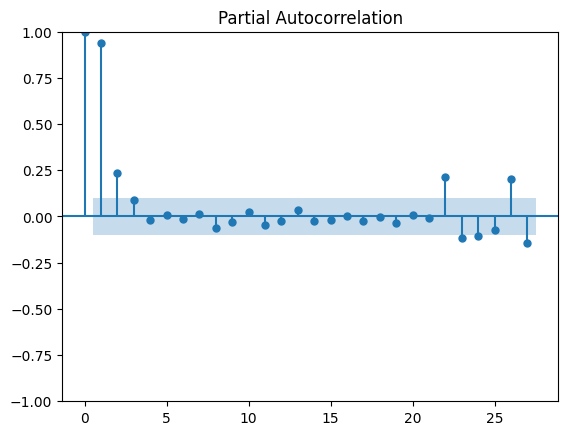

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(AMAZON_df['Preco_Fechamento'])
plot_pacf(AMAZON_df['Preco_Fechamento'])
plt.show()

In [61]:
from statsmodels.tsa.stattools import adfuller

# Teste de Dickey-Fuller aumentado
resultado_teste = adfuller(AMAZON_df['Preco_Fechamento'])
print('Estatística do teste:', resultado_teste[0])
print('Valor-p:', resultado_teste[1])

Estatística do teste: -2.6948009836539306
Valor-p: 0.0749422549125391


In [62]:
AMAZON_df['Data'] = pd.to_datetime(AMAZON_df['Data'])
AMAZON_df.set_index('Data', inplace=True)

In [63]:
p, d, q = 1, 1, 1

In [64]:
modelo = ARIMA(AMAZON_df['Preco_Fechamento'], order=(p, d, q))
resultado = modelo.fit()

C:\Users\srgio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\srgio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\srgio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

In [65]:
horizonte = 10
previsoes = resultado.predict(start=len(AMAZON_df), end=len(AMAZON_df)+horizonte-1, typ='levels')

C:\Users\srgio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\srgio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\srgio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeEr